In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA

In [10]:
customers = pd.read_csv(r"C:\Users\praba\Downloads\Customers.csv")
transactions = pd.read_csv(r"C:\Users\praba\Downloads\Transactions.csv")


In [11]:
merged_data = transactions.merge(customers, on='CustomerID')

In [12]:
# Generate aggregated features per customer
customer_features = merged_data.groupby('CustomerID').agg(
    TotalTransactions=('TransactionID', 'count'),
    TotalQuantity=('Quantity', 'sum'),
    TotalSpent=('TotalValue', 'sum'),
    AvgTransactionValue=('TotalValue', 'mean')
).reset_index()


In [13]:
# Merge aggregated features back with customer profile data
customer_features = customer_features.merge(customers, on='CustomerID')

In [14]:
# Encode categorical variables and normalize numerical variables
customer_features['Region'] = customer_features['Region'].astype('category').cat.codes
numerical_features = ['TotalTransactions', 'TotalQuantity', 'TotalSpent', 'AvgTransactionValue', 'Region']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[numerical_features])

In [15]:
# Clustering using K-Means
# Determine the optimal number of clusters using the Elbow Method
inertia = []
range_clusters = range(2, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

C:\Users\praba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\praba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\praba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\praba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

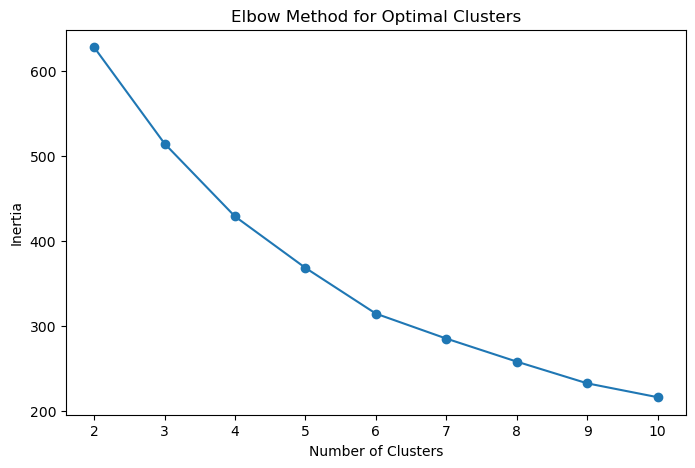

In [16]:

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [17]:
# Choose the optimal number of clusters 
optimal_clusters = 4  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)
customer_features['Cluster'] = kmeans.labels_

# Evaluate Clustering Performance
# Calculate Davies-Bouldin Index and Silhouette Score
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')


C:\Users\praba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\praba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 1.2406763161480105
Silhouette Score: 0.25233520583335356


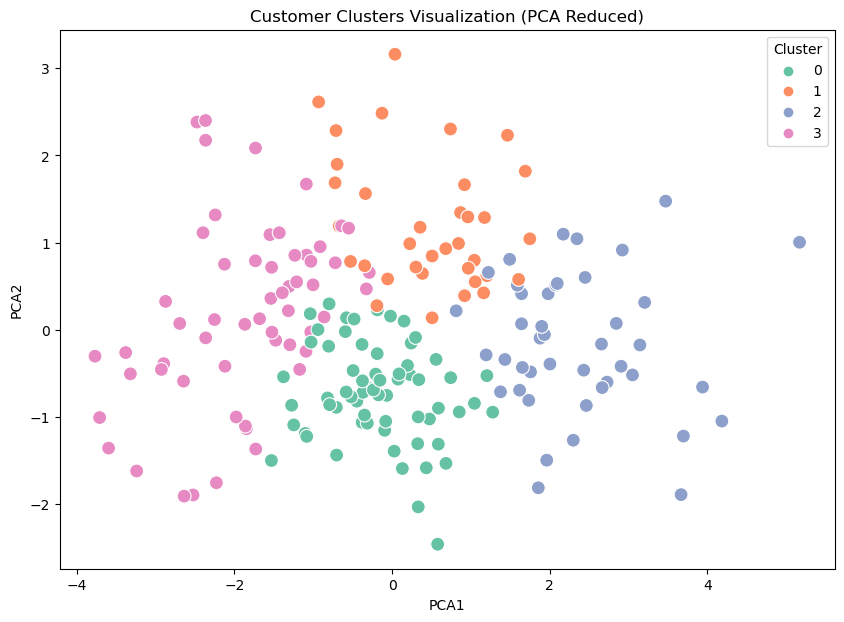

In [18]:
# Visualize Clusters using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
customer_features['PCA1'] = reduced_features[:, 0]
customer_features['PCA2'] = reduced_features[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=customer_features, palette='Set2', s=100
)
plt.title('Customer Clusters Visualization (PCA Reduced)')
plt.show()

In [19]:
# Save Results

customer_features[['CustomerID', 'Cluster']].to_csv('Customer_Segmentation_Results.csv', index=False)